Сравнение времени, затрачиваемого JSON и JSONB при вставке данных в базу данных:

| Типа  | Времия |
| ----- | ------ |
| JSON  | 49s    |
| JSONB | 79.32s |


In [1]:
import psycopg2 as pg
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pickle

读取 JSON 的 ID 测试

In [4]:
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/json/res_id.bits', 'rb')
json_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒



In [5]:
json_id.sort_values(by='use_time_ms', inplace=True)
json_id.reset_index(inplace=True)
json_id

,index,len_row,use_time_ms
0,0,400,8761
1,0,6904,8919
2,0,645,8950
3,0,1309,9009
4,0,228,9171
...,...,...,...
2994,0,4475292,22583
2995,0,5055124,23027
2996,0,5689620,23523
2997,0,225,48839


In [6]:
json_id = json_id[json_id['use_time_ms'] < 25000]
json_id

,index,len_row,use_time_ms
0,0,400,8761
1,0,6904,8919
2,0,645,8950
3,0,1309,9009
4,0,228,9171
...,...,...,...
2992,0,3962467,21742
2993,0,5386743,22470
2994,0,4475292,22583
2995,0,5055124,23027


对 tb_json 表 SELEXT 整个 JSON 字段的速度测试


# Тест скорости на таблице tb_json SELEXT полного поля JSON

ось x - длина JSON

ось y - время

Text(0, 0.5, 'Query time (milliseconds)')

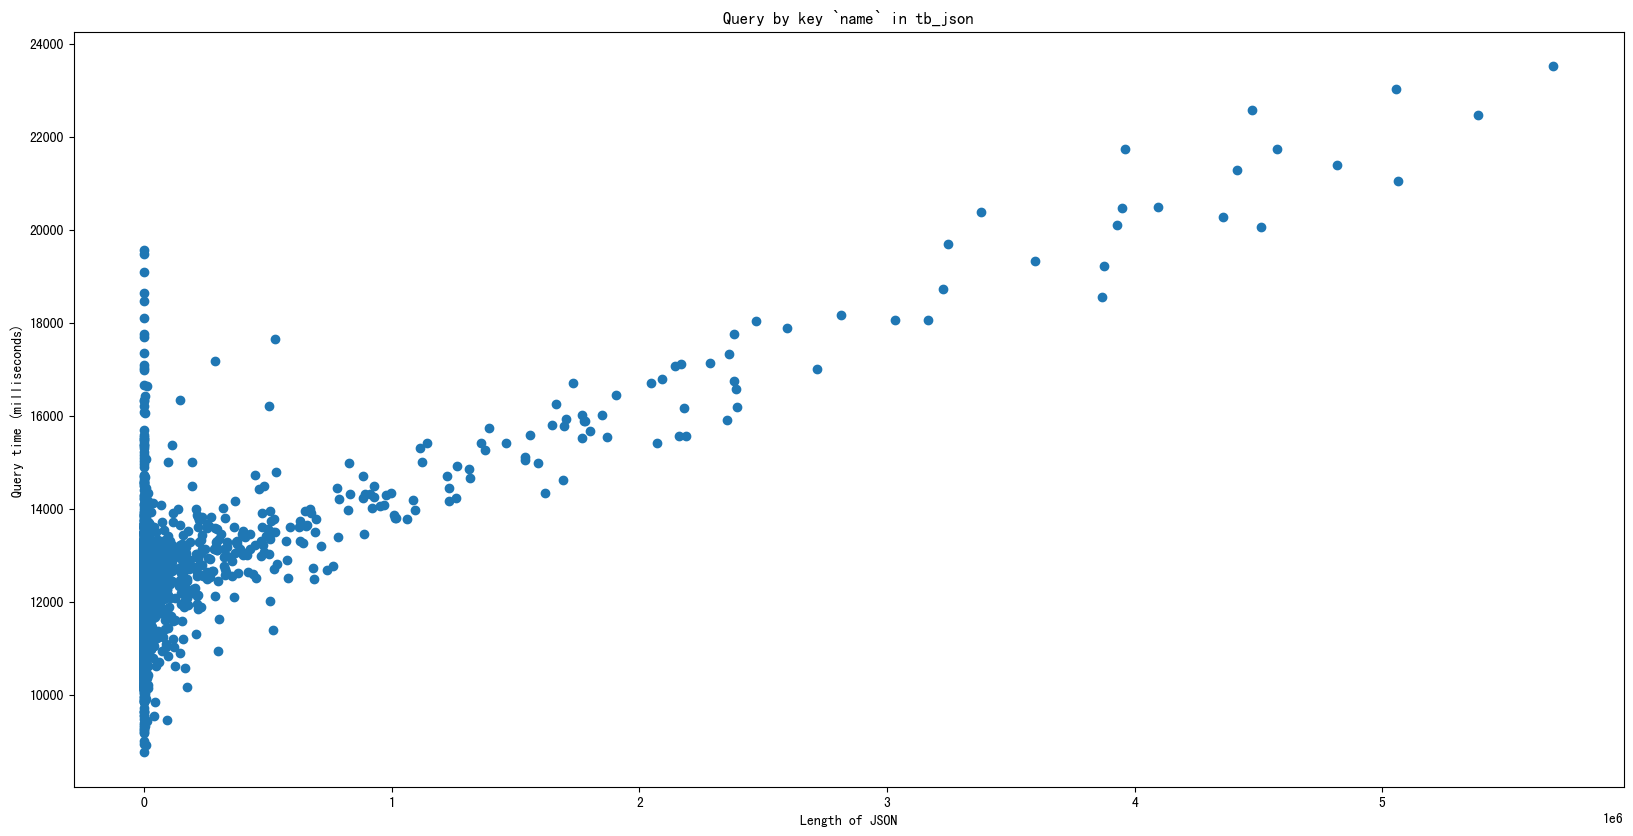

In [7]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['use_time_ms'].values)
plt.title('Query by key `name` in tb_json')
plt.xlabel('Length of JSON')
plt.ylabel('Query time (milliseconds)')

读取 JSONB 的 ID 测试

In [8]:
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/jsonb/res_id.bits', 'rb')
jsonb_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
jsonb_id.sort_values(by='use_time_ms', inplace=True)
jsonb_id.reset_index(inplace=True)
jsonb_id

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒



,index,len_row,use_time_ms
0,0,7557,8621
1,0,221,8959
2,0,201,9087
3,0,1980,9330
4,0,1344,9379
...,...,...,...
2994,0,4817641,38646
2995,0,5064904,39303
2996,0,5055124,41648
2997,0,5386743,43229


对 tb_jsonb 表 SELEXT 整个 JSONB 字段的速度测试


# Тест скорости на таблице tb_jsonb SELEXT полного поля JSONB

Text(0, 0.5, 'Query time (milliseconds)')

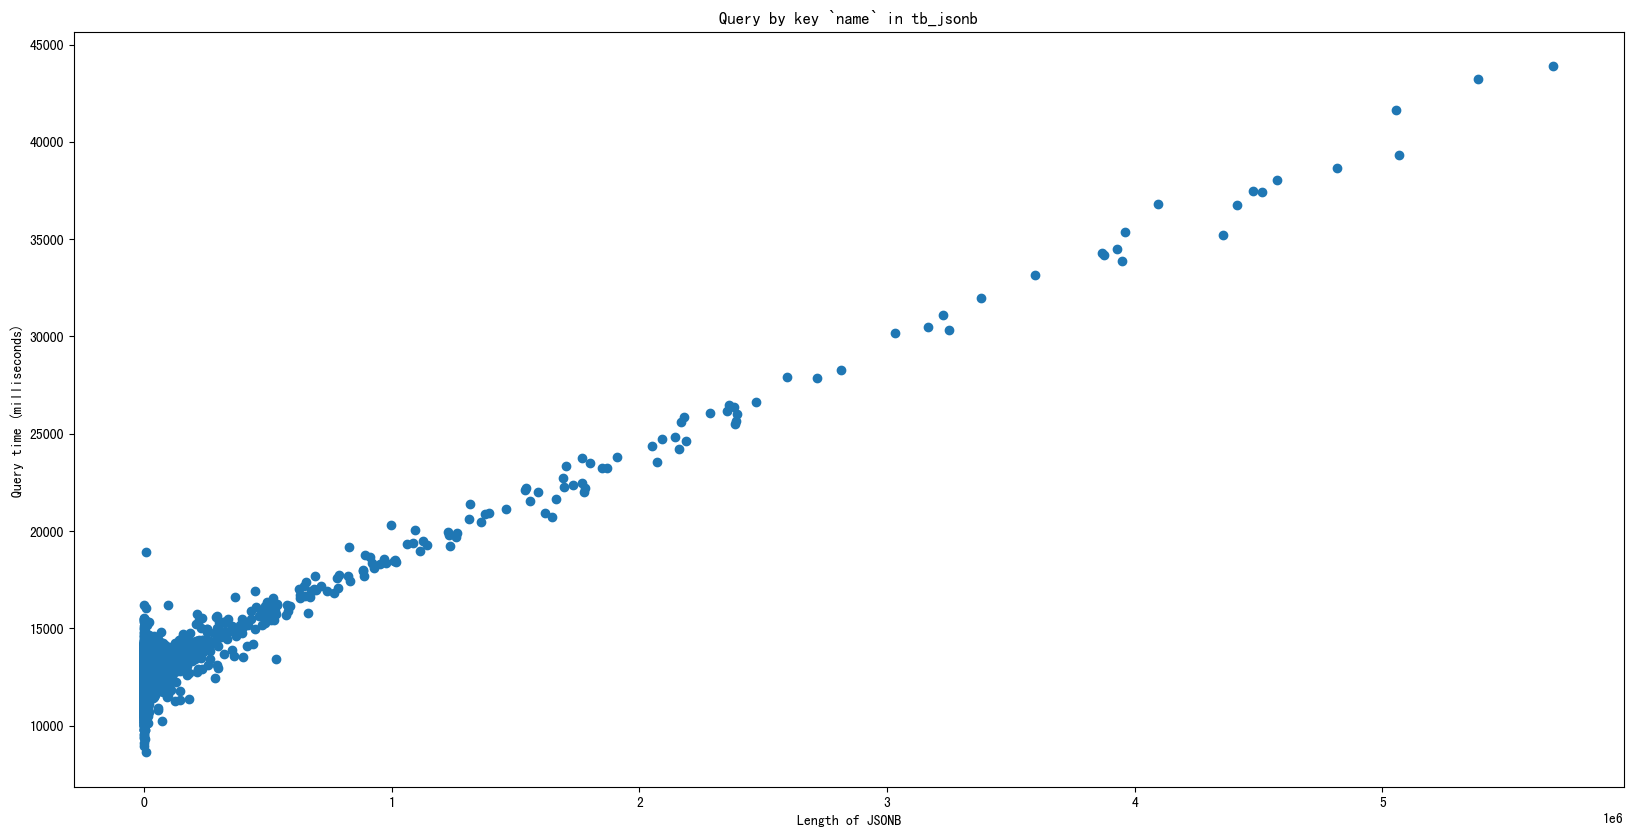

In [9]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['use_time_ms'].values)
plt.title('SELECT Query by key `name` in tb_jsonb (not Index on ID)')
plt.xlabel('Length of JSONB')
plt.ylabel('SELECT Query time (milliseconds)')

联合绘制 JSON 和 JSONB

Сравнение скорости между JSON и JSONB для SELEXT полного поля JSON(B)

Мы видим, что для SELECT JSONB медленнее, чем JSON, вероятно, потому что JSONB необходимо разобрать, что вызывает падение скорости.

Text(0, 0.5, 'Query time (milliseconds)')

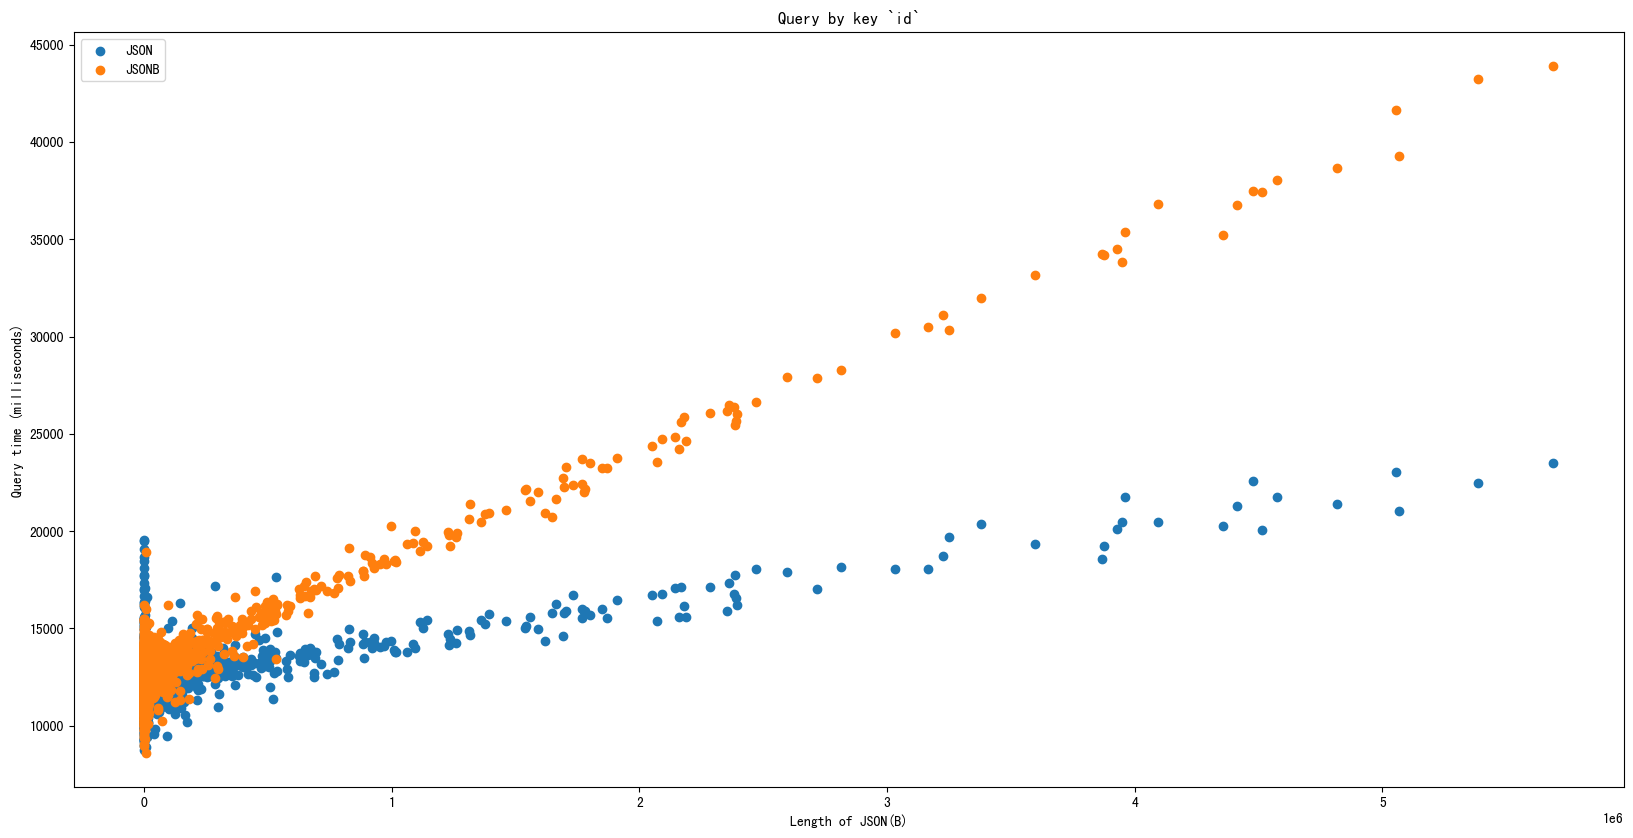

In [14]:
plt.figure(figsize=(20, 10), dpi=100)
# plt.scatter(x=[json_id['len_row'].values, jsonb_id['len_row'].values],
#             y=[json_id['use_time_ms'].values, jsonb_id['use_time_ms'].values])
plt.scatter(x=json_id['len_row'].values,
            y=json_id['use_time_ms'].values,
            label='JSON')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['use_time_ms'].values,
            label='JSONB')
plt.legend()
plt.title('SELECT Query by key `id` (not Index on ID)')
plt.xlabel('Length of JSON(B)')
plt.ylabel('SELECT Query time (milliseconds)')

对通过 ID 的所有字段进行联合绘制

# Совместное рисование всех полей по ID

In [2]:
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/json/res_id.bits', 'rb')
json_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
json_id.sort_values(by='len_row', inplace=True)
json_id.reset_index(inplace=True)


print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/jsonb/res_id.bits', 'rb')
jsonb_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
jsonb_id.sort_values(by='len_row', inplace=True)
jsonb_id.reset_index(inplace=True)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒



Text(0, 0.5, 'SELECT Query time (milliseconds)')

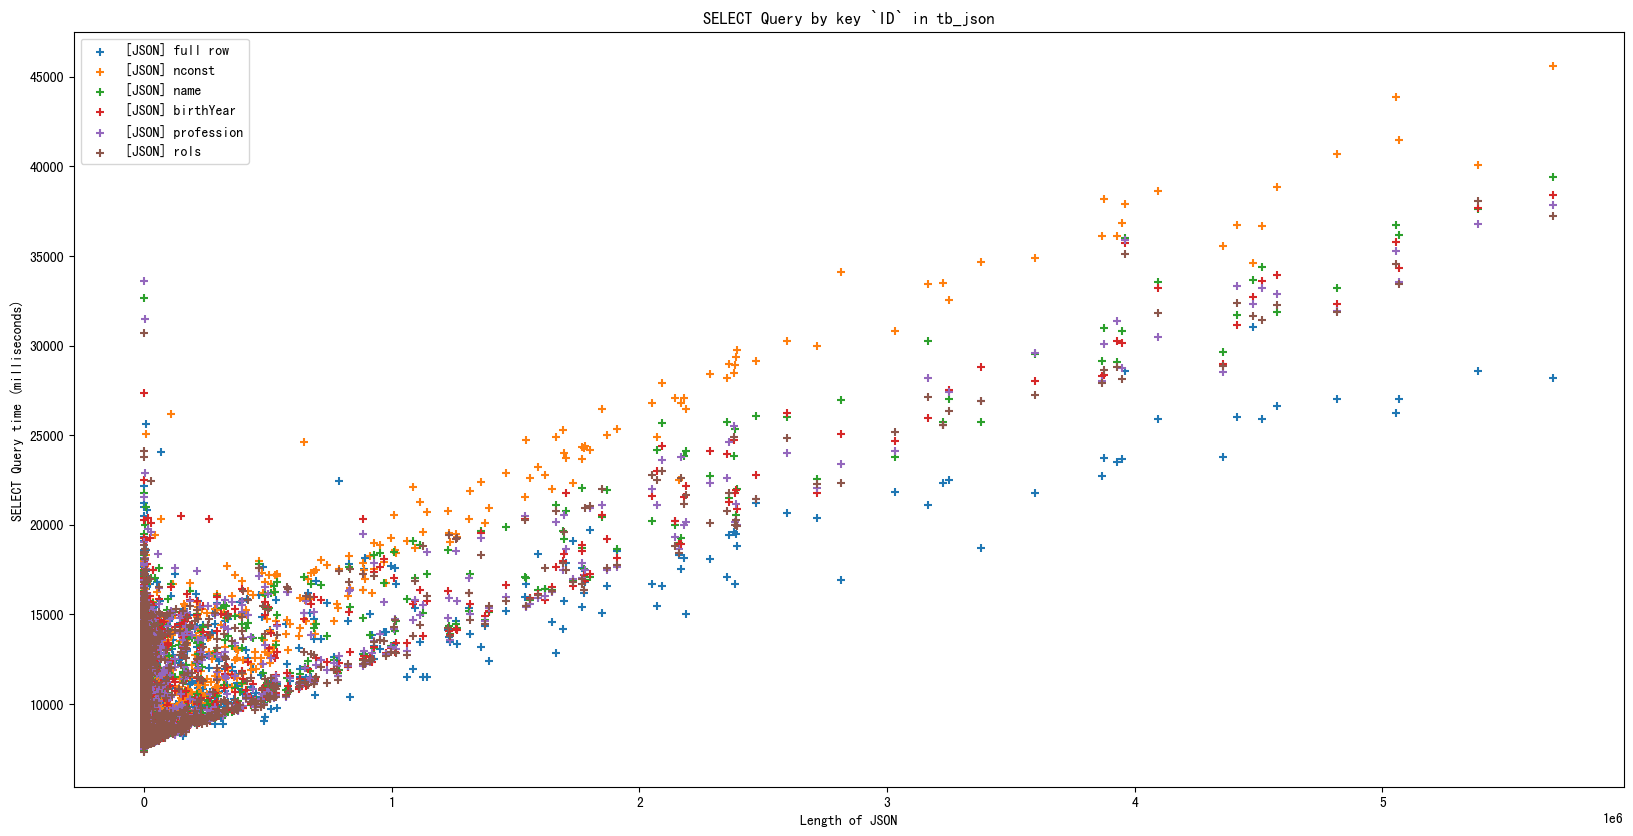

In [3]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['full_ms'].values,
            marker='+',
            label='[JSON] full row')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['nconst_ms'].values,
            marker='+',
            label='[JSON] nconst')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['name_ms'].values,
            marker='+',
            label='[JSON] name')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['birthYear_ms'].values,
            marker='+',
            label='[JSON] birthYear')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['profession_ms'].values,
            marker='+',
            label='[JSON] profession')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['rols_ms'].values,
            marker='+',
            label='[JSON] rols')

plt.legend()
plt.title('SELECT Query by key `ID` in tb_json')
plt.xlabel('Length of JSON')
plt.ylabel('SELECT Query time (milliseconds)')

Text(0, 0.5, 'Query time (milliseconds)')

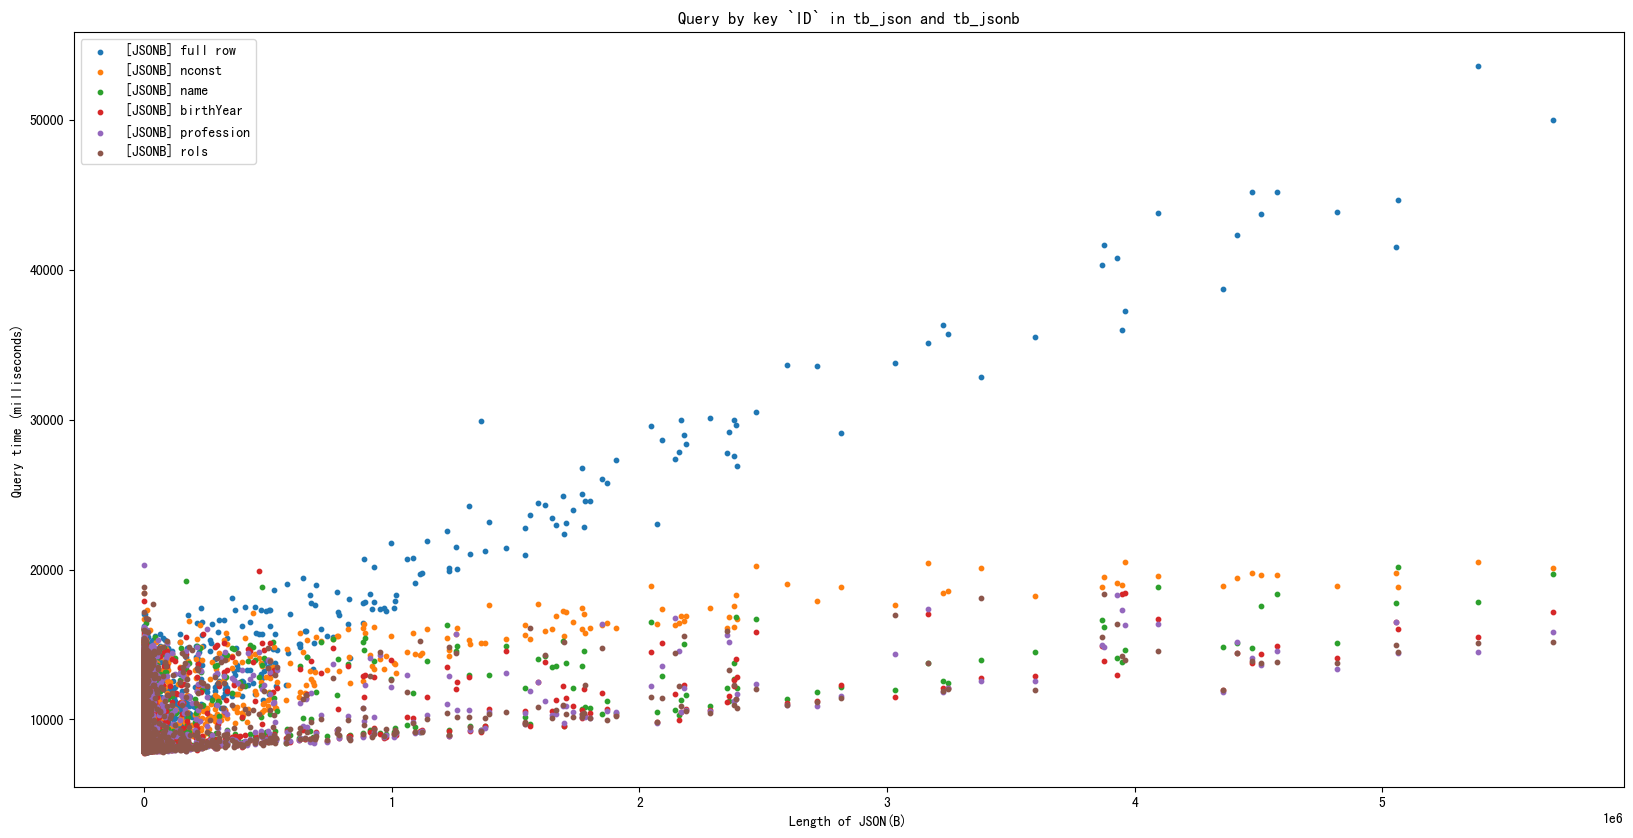

In [4]:
plt.figure(figsize=(20, 10), dpi=100)

plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['full_ms'].values,
            s=10,
            label='[JSONB] full row')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['nconst_ms'].values,
            s=10,
            label='[JSONB] nconst')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['name_ms'].values,
            s=10,
            label='[JSONB] name')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['birthYear_ms'].values,
            s=10,
            label='[JSONB] birthYear')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['profession_ms'].values,
            s=10,
            label='[JSONB] profession')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['rols_ms'].values,
            s=10,
            label='[JSONB] rols')

plt.legend()
plt.title('Query by key `ID` in tb_json and tb_jsonb')
plt.xlabel('Length of JSON(B)')
plt.ylabel('Query time (milliseconds)')

Text(0, 0.5, 'SELECT Query time (milliseconds)')

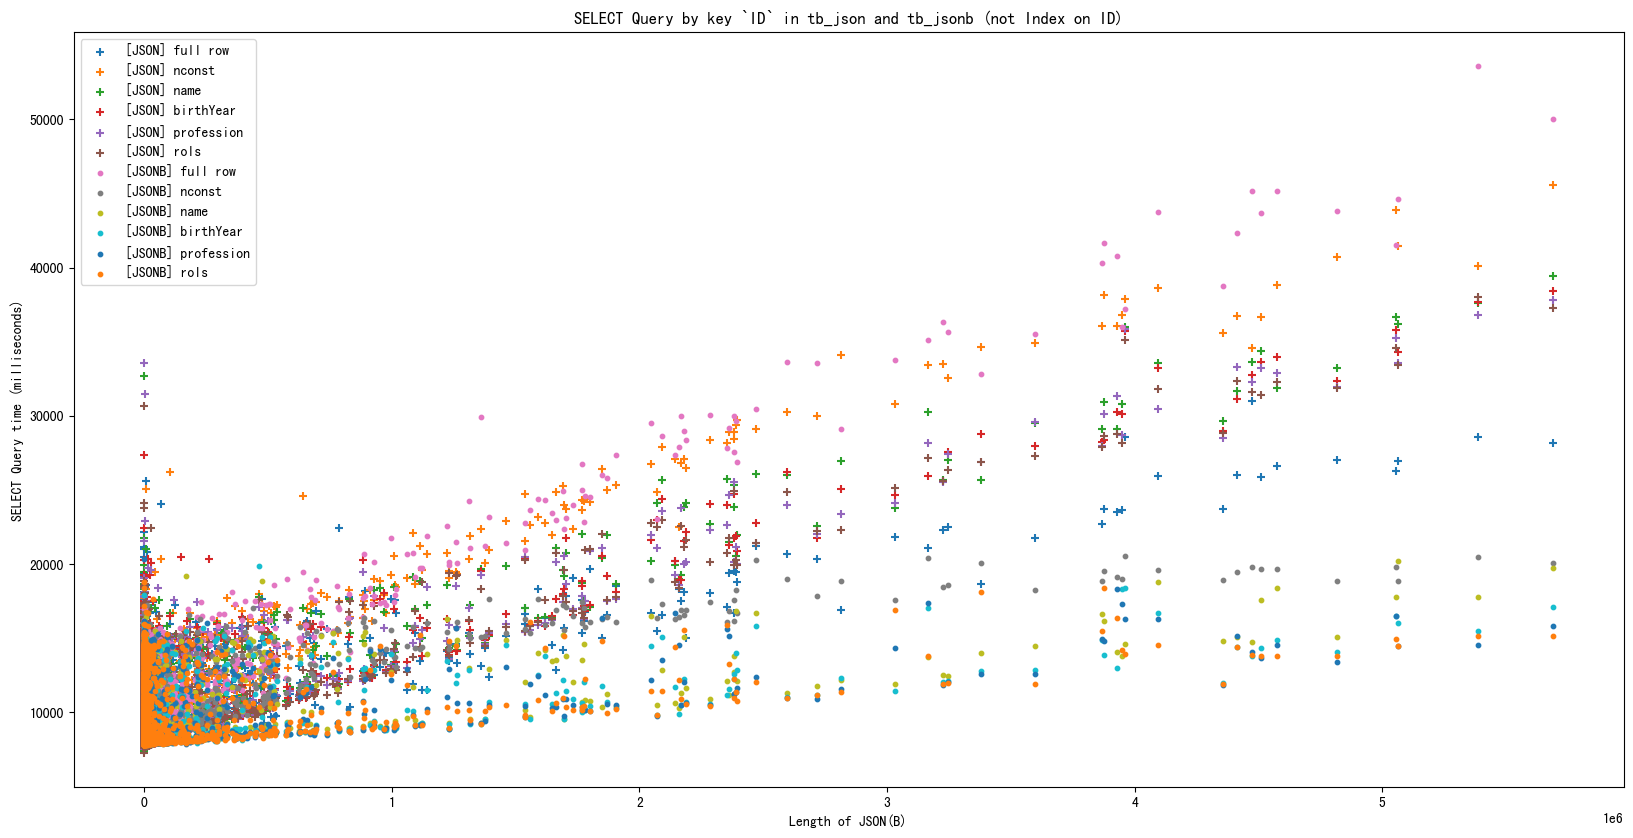

In [5]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['full_ms'].values,
            marker='+',
            label='[JSON] full row')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['nconst_ms'].values,
            marker='+',
            label='[JSON] nconst')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['name_ms'].values,
            marker='+',
            label='[JSON] name')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['birthYear_ms'].values,
            marker='+',
            label='[JSON] birthYear')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['profession_ms'].values,
            marker='+',
            label='[JSON] profession')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['rols_ms'].values,
            marker='+',
            label='[JSON] rols')

################################################################################

plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['full_ms'].values,
            s=10,
            label='[JSONB] full row')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['nconst_ms'].values,
            s=10,
            label='[JSONB] nconst')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['name_ms'].values,
            s=10,
            label='[JSONB] name')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['birthYear_ms'].values,
            s=10,
            label='[JSONB] birthYear')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['profession_ms'].values,
            s=10,
            label='[JSONB] profession')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['rols_ms'].values,
            s=10,
            label='[JSONB] rols')

plt.legend()
plt.title('SELECT Query by key `ID` in tb_json and tb_jsonb (not Index on ID)')
plt.xlabel('Length of JSON(B)')
plt.ylabel('SELECT Query time (milliseconds)')

# ↑ Сравнение скорости запросов к таблицам JSON и JSONB для всех полей

JSON 和 JSONB 表的所有字段查询速度对比

---

In [6]:
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/json/res_id_ix_every_col.bits', 'rb')
json_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
json_id.sort_values(by='len_row', inplace=True)
json_id.reset_index(inplace=True)


print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/jsonb/res_id_ix_every_col.bits', 'rb')
jsonb_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
jsonb_id.sort_values(by='len_row', inplace=True)
jsonb_id.reset_index(inplace=True)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒



In [7]:
jsonb_id = jsonb_id[jsonb_id['rols_ms'] < 150000]

Text(0, 0.5, 'Query time (milliseconds)')

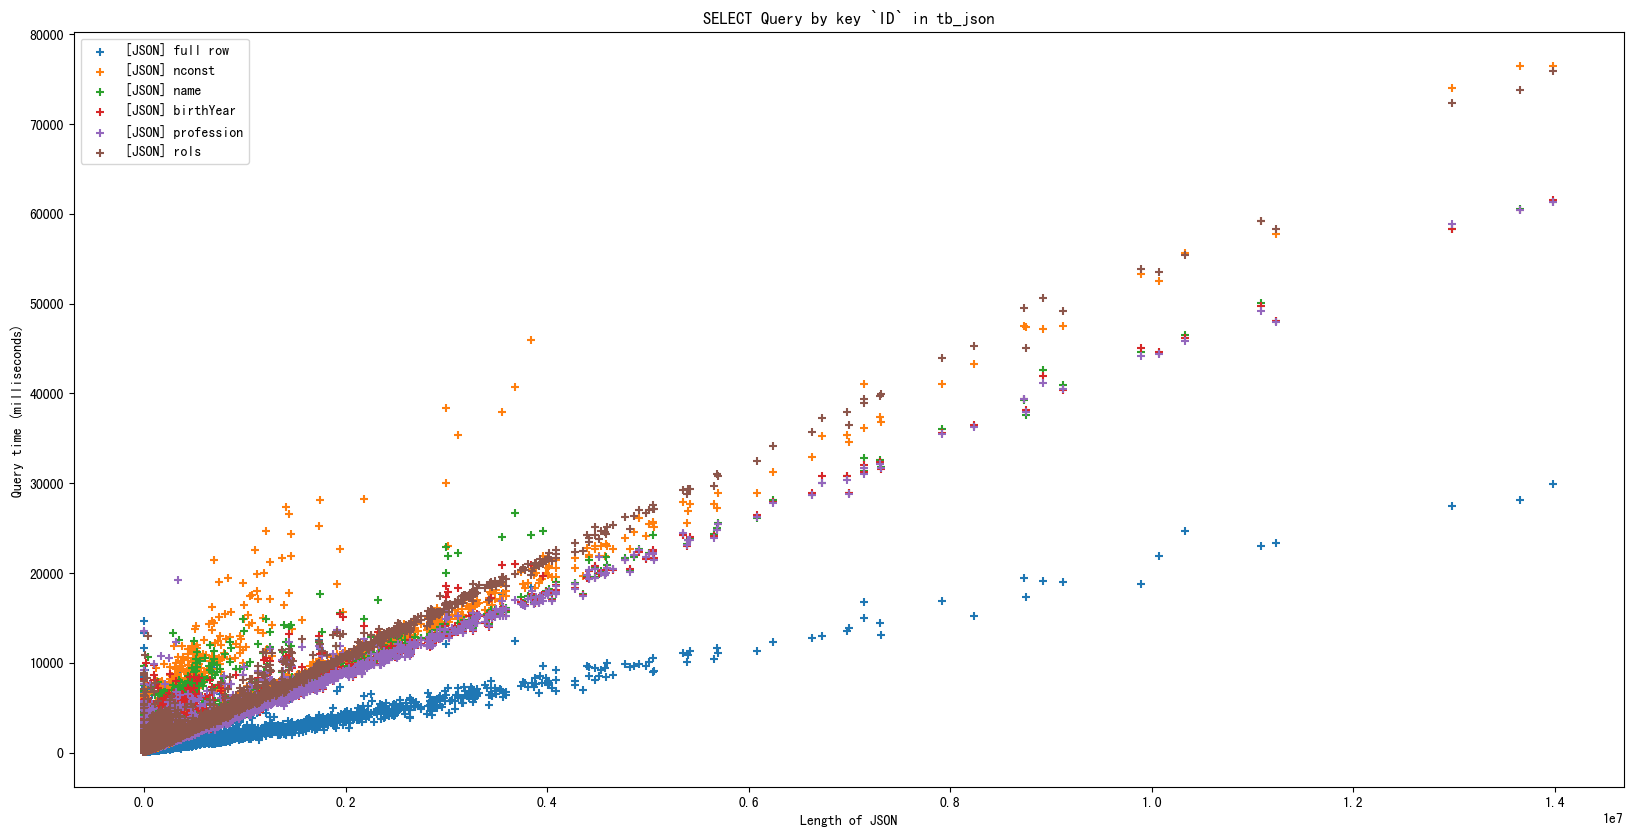

In [10]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['full_ms'].values,
            marker='+',
            label='[JSON] full row')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['nconst_ms'].values,
            marker='+',
            label='[JSON] nconst')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['name_ms'].values,
            marker='+',
            label='[JSON] name')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['birthYear_ms'].values,
            marker='+',
            label='[JSON] birthYear')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['profession_ms'].values,
            marker='+',
            label='[JSON] profession')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['rols_ms'].values,
            marker='+',
            label='[JSON] rols')

plt.legend()
plt.title('SELECT Query by key `ID` in tb_json')
plt.xlabel('Length of JSON')
plt.ylabel('Query time (milliseconds)')

Text(0, 0.5, 'Query time (milliseconds)')

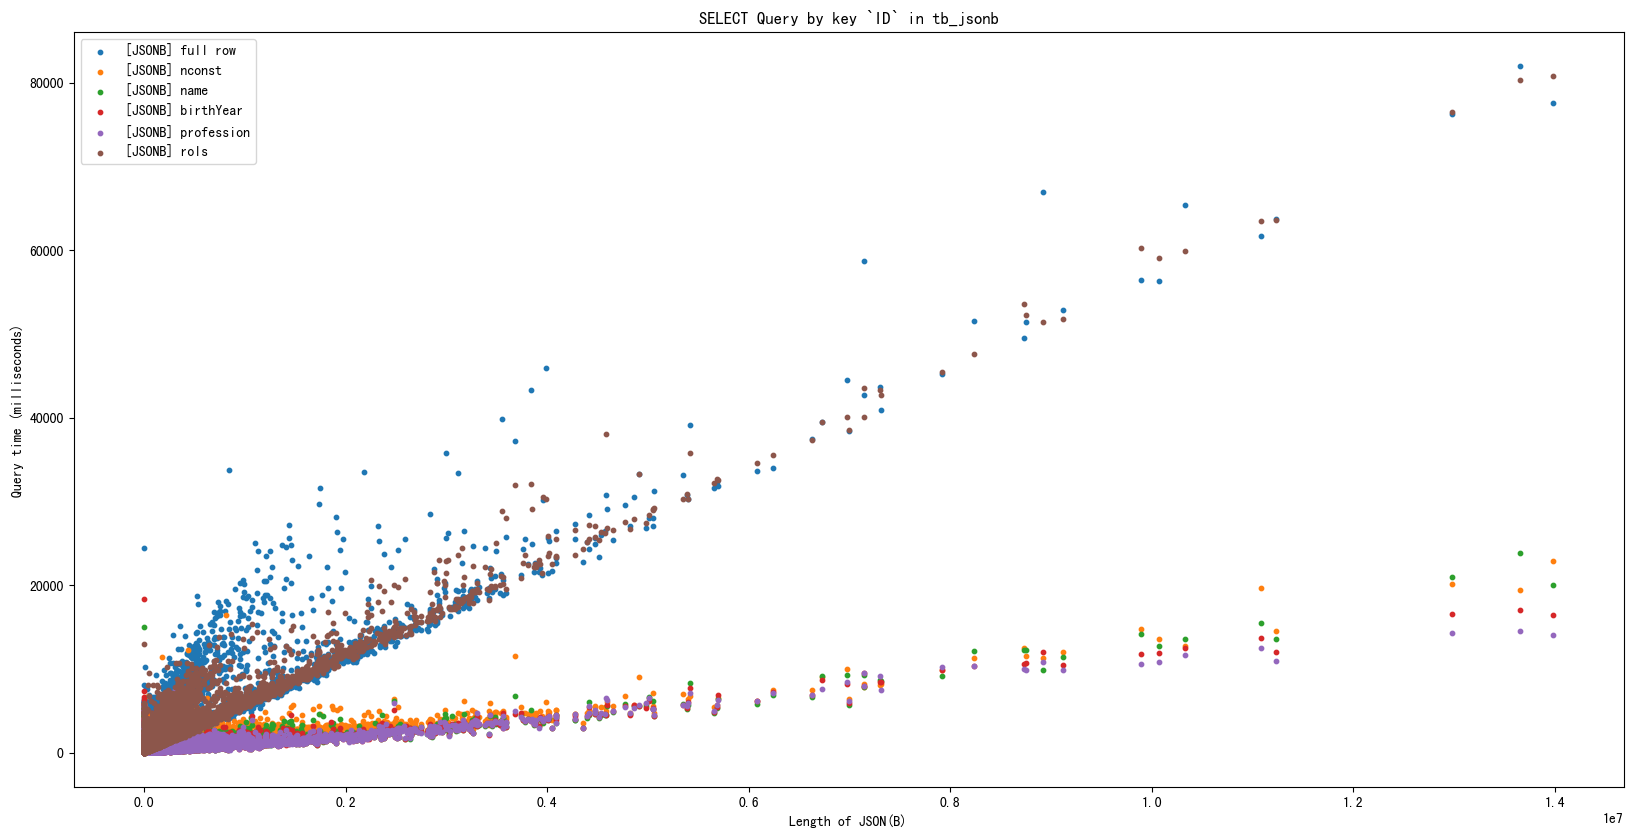

In [11]:
plt.figure(figsize=(20, 10), dpi=100)

plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['full_ms'].values,
            s=10,
            label='[JSONB] full row')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['nconst_ms'].values,
            s=10,
            label='[JSONB] nconst')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['name_ms'].values,
            s=10,
            label='[JSONB] name')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['birthYear_ms'].values,
            s=10,
            label='[JSONB] birthYear')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['profession_ms'].values,
            s=10,
            label='[JSONB] profession')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['rols_ms'].values,
            s=10,
            label='[JSONB] rols')

plt.legend()
plt.title('SELECT Query by key `ID` in tb_jsonb')
plt.xlabel('Length of JSON(B)')
plt.ylabel('Query time (milliseconds)')

Text(0, 0.5, 'SELECT Query time (milliseconds)')

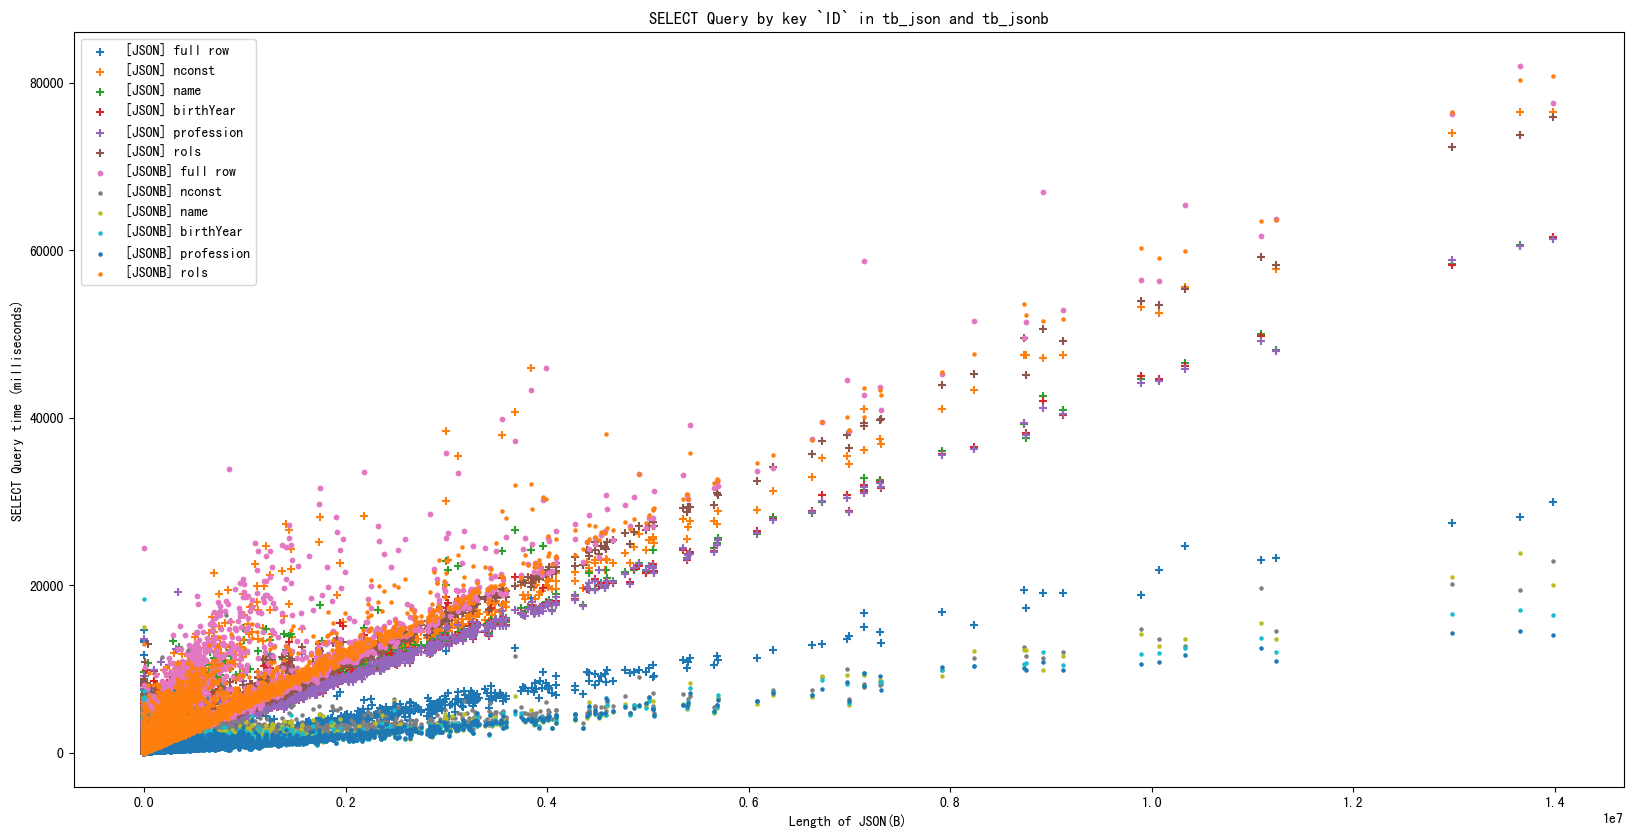

In [12]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['full_ms'].values,
            marker='+',
            label='[JSON] full row')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['nconst_ms'].values,
            marker='+',
            label='[JSON] nconst')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['name_ms'].values,
            marker='+',
            label='[JSON] name')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['birthYear_ms'].values,
            marker='+',
            label='[JSON] birthYear')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['profession_ms'].values,
            marker='+',
            label='[JSON] profession')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['rols_ms'].values,
            marker='+',
            label='[JSON] rols')

################################################################################

plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['full_ms'].values,
            s=10,
            label='[JSONB] full row')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['nconst_ms'].values,
            s=5,
            label='[JSONB] nconst')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['name_ms'].values,
            s=5,
            label='[JSONB] name')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['birthYear_ms'].values,
            s=5,
            label='[JSONB] birthYear')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['profession_ms'].values,
            s=5,
            label='[JSONB] profession')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['rols_ms'].values,
            s=5,
            label='[JSONB] rols')

plt.legend()
plt.title('SELECT Query by key `ID` in tb_json and tb_jsonb')
plt.xlabel('Length of JSON(B)')
plt.ylabel('SELECT Query time (milliseconds)')

# ↑ Сравнение скорости запросов к таблицам JSON и JSONB для всех полей

JSON 和 JSONB 表的所有字段查询速度对比

---

# ↓ Скорость UPDATE

UPDATE 速度

In [15]:
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/json/res_update_id_ix_every_col.bits', 'rb')
json_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
json_id.sort_values(by='len_row', inplace=True)
json_id.reset_index(inplace=True)


print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/jsonb/res_update_id_ix_every_col.bits', 'rb')
jsonb_id = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
jsonb_id.sort_values(by='len_row', inplace=True)
jsonb_id.reset_index(inplace=True)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒



Text(0, 0.5, 'Query time (milliseconds)')

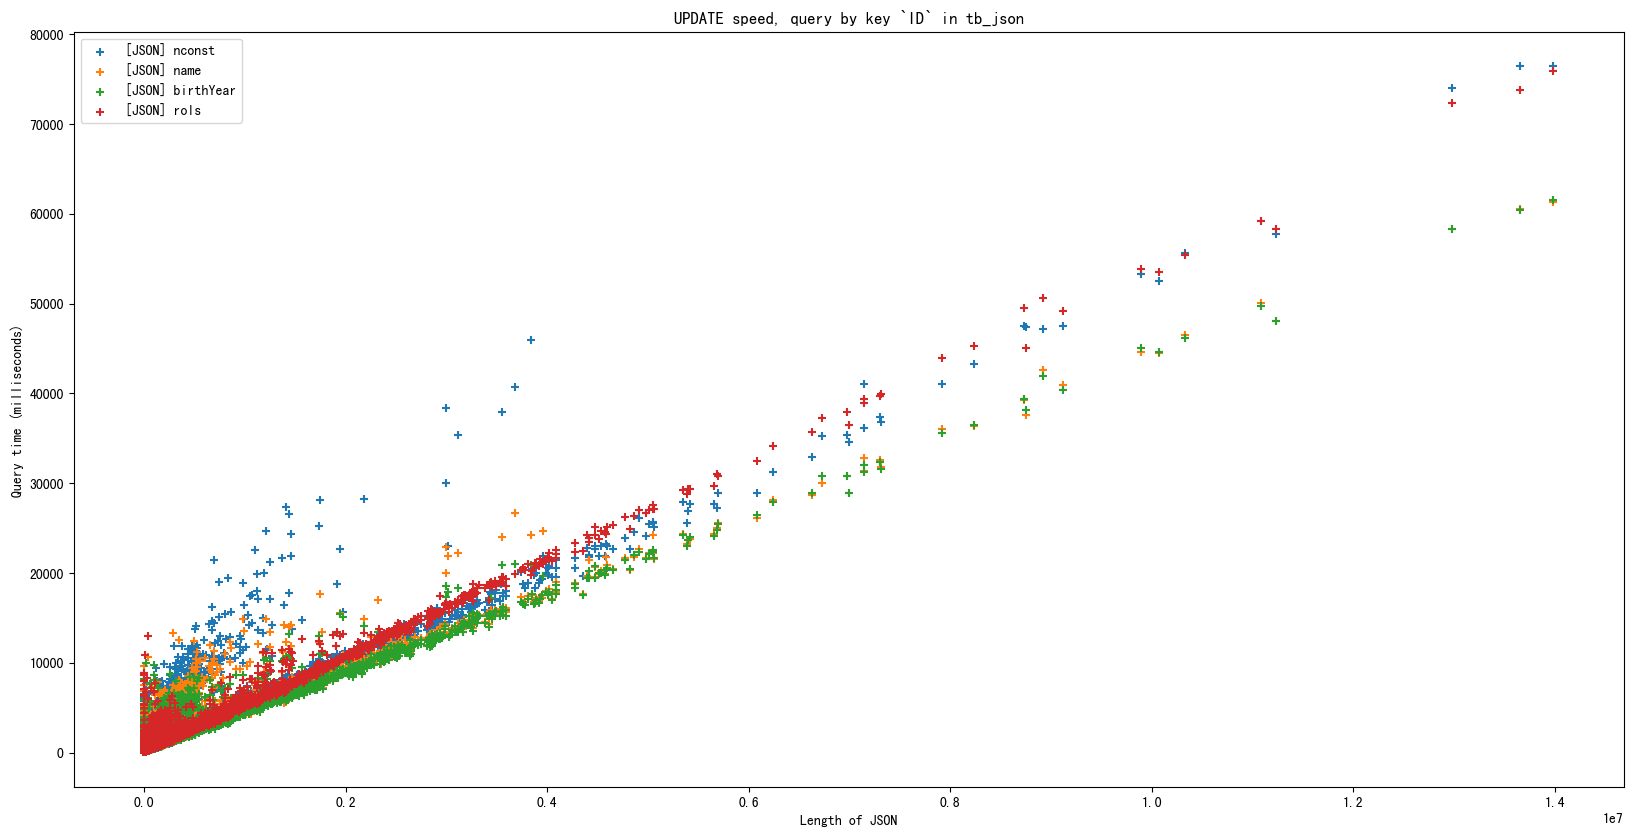

In [13]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['nconst_ms'].values,
            marker='+',
            label='[JSON] nconst')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['name_ms'].values,
            marker='+',
            label='[JSON] name')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['birthYear_ms'].values,
            marker='+',
            label='[JSON] birthYear')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['rols_ms'].values,
            marker='+',
            label='[JSON] rols')

plt.legend()
plt.title('UPDATE speed, query by key `ID` in tb_json')
plt.xlabel('Length of JSON')
plt.ylabel('Query time (milliseconds)')

# ↑ Сравнение времени UPDATE для каждого поля JSON в таблице tb_json

---

Text(0, 0.5, 'Query time (milliseconds)')

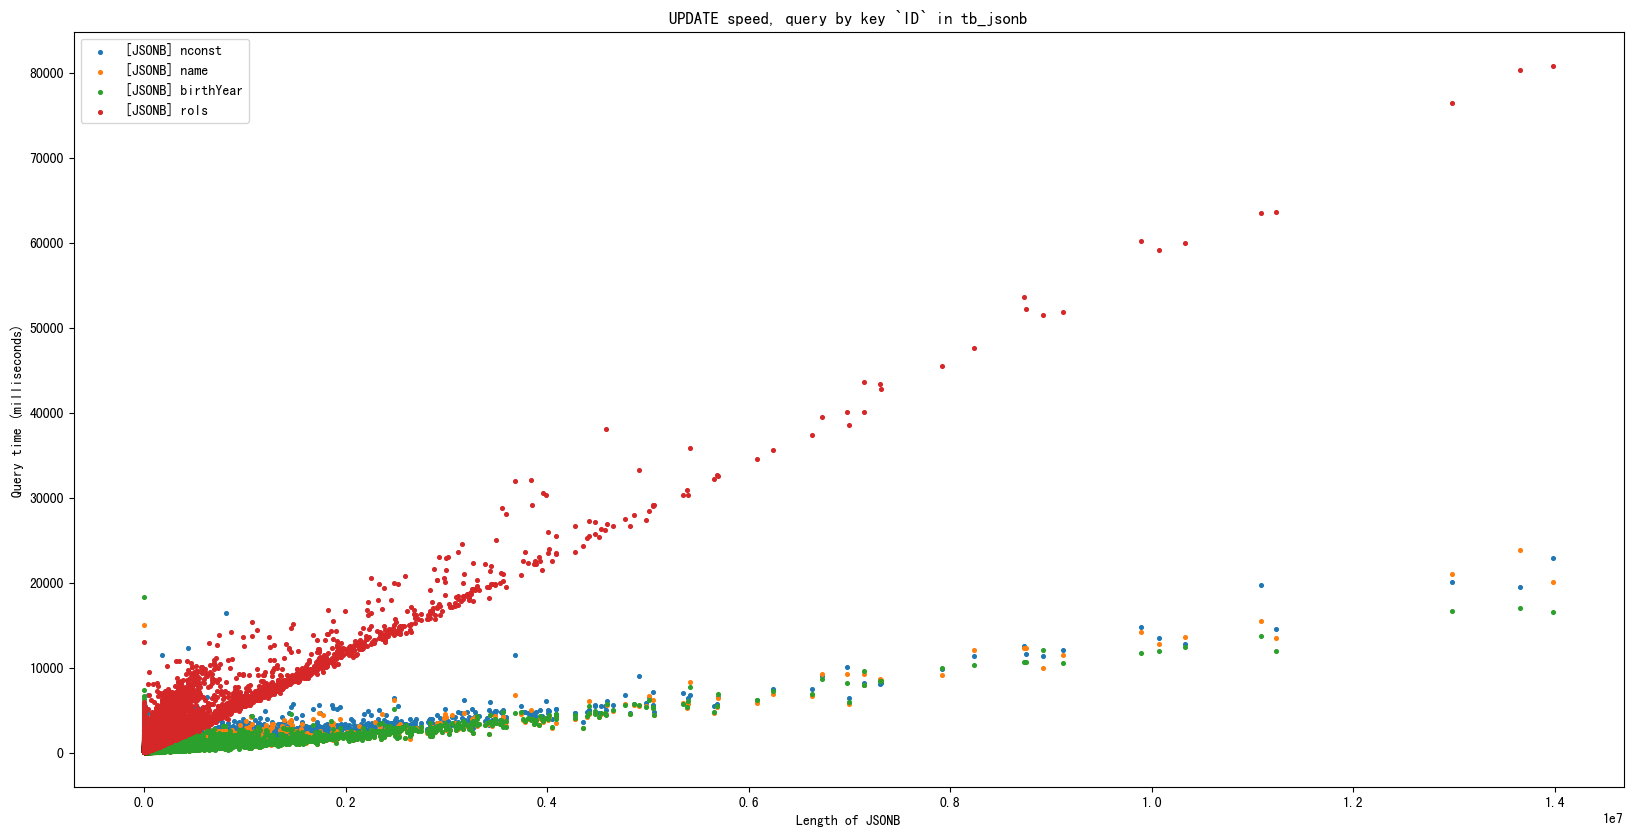

In [14]:
plt.figure(figsize=(20, 10), dpi=100)

plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['nconst_ms'].values,
            s=7,
            label='[JSONB] nconst')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['name_ms'].values,
            s=7,
            label='[JSONB] name')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['birthYear_ms'].values,
            s=7,
            label='[JSONB] birthYear')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['rols_ms'].values,
            s=7,
            label='[JSONB] rols')

plt.legend()
plt.title('UPDATE speed, query by key `ID` in tb_jsonb')
plt.xlabel('Length of JSONB')
plt.ylabel('Query time (milliseconds)')

# ↑ Сравнение времени UPDATE для каждого поля JSON в таблице tb_json

---

Text(0, 0.5, 'Query time (milliseconds)')

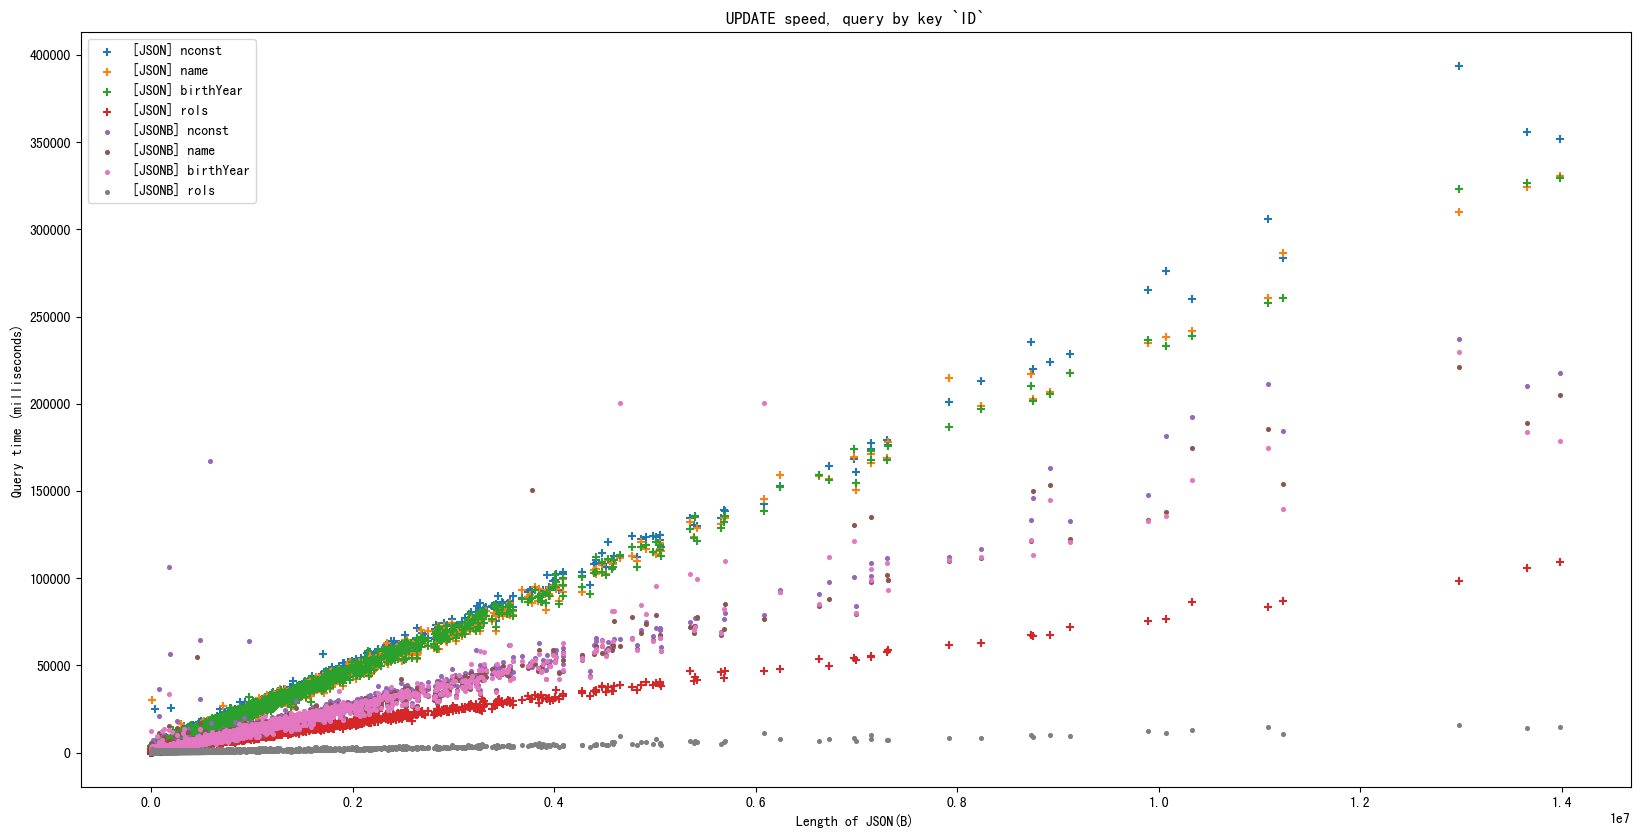

In [19]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(x=json_id['len_row'].values,
            y=json_id['nconst_ms'].values,
            marker='+',
            label='[JSON] nconst')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['name_ms'].values,
            marker='+',
            label='[JSON] name')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['birthYear_ms'].values,
            marker='+',
            label='[JSON] birthYear')
plt.scatter(x=json_id['len_row'].values,
            y=json_id['rols_ms'].values,
            marker='+',
            label='[JSON] rols')

################################################################################

plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['nconst_ms'].values,
            s=7,
            label='[JSONB] nconst')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['name_ms'].values,
            s=7,
            label='[JSONB] name')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['birthYear_ms'].values,
            s=7,
            label='[JSONB] birthYear')
plt.scatter(x=jsonb_id['len_row'].values,
            y=jsonb_id['rols_ms'].values,
            s=7,
            label='[JSONB] rols')

plt.legend()
plt.title('UPDATE speed, query by key `ID`')
plt.xlabel('Length of JSON(B)')
plt.ylabel('Query time (milliseconds)')

# ↑ Сравнение скорости UPDATE к таблицам JSON и JSONB для всех полей

---

In [4]:
# 最长 JSON
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/雪狸的文件/Programma/db-port-project/lab3.2/JSON 速度测试/result/df_id_json_len.bits', 'rb')
json_id_len = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')
json_id_len.set_index('id', inplace=True)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 0  秒



In [12]:
json_id_len

,id,len_json
0,51989,187
0,104698,187
0,59930,188
0,112717,189
0,103739,189
...,...,...
0,14669,11081638
0,20889,11228211
0,7402,12978586
0,10614,13655243


In [16]:
print('>>' * 50)
print('[INFO] 读取序列化数据')
time_start = datetime.datetime.now()
f = open('/Users/fox/Library/CloudStorage/OneDrive-PetertheGreatSt.PetersburgPolytechnicalUniversity/СПБПУ/3 курс/6 семестр/СУБД/资料/DataSet/result_ALL/dump_ALL.bits', 'rb')
json_id_len = pickle.load(file=f)
f.close()
time_end = datetime.datetime.now()
print('[INFO] 读取序列化数据结束，用时：', (time_end - time_start).seconds, ' 秒\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
[INFO] 读取序列化数据
[INFO] 读取序列化数据结束，用时： 77  秒



In [17]:
json_id_len

,nconst,name,birthYear,deathYear,profession,rols
0,nm0000009,Richard Burton,1925,1984,"actor,soundtrack,producer",title series...
1,nm0000015,James Dean,1931,1955,"actor,miscellaneous",title ...
2,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack",title seri...
3,nm0000038,Grace Kelly,1929,1982,"actress,soundtrack",title series name year char...
4,nm0000045,Bruce Lee,1940,1973,"actor,writer,miscellaneous",title series name year ...
...,...,...,...,...,...,...
119473,nm9992837,Ne,None,None,actress,title ...
119474,nm9992951,Theo Nicholas,None,None,actor,title ...
119475,nm9993284,Niru,None,None,composer,title series name ye...
119476,nm9993576,Romanie,None,None,None,title \ 0 ...
